## Chi square plot

In [1]:
import numpy as np
import bilby
from matplotlib import pyplot as plt
#from multiprocessing import Pool

In [26]:
from tqdm import tqdm
from scipy.stats import chi2

In [70]:
from matplotlib import rcParams

In [161]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

In [71]:
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True

In [2]:
duration = 4
sampling_freq = 2048
time_array = np.arange(0, 4, 1/sampling_freq)
frequency_array = bilby.core.utils.create_frequency_series(sampling_freq, duration)
psd = 1* np.ones_like(frequency_array)

In [3]:

def create_t_domain_noise(sampling_freq, duration, psd):
    f_noise, freqs = bilby.core.utils.create_white_noise(sampling_freq, duration)*psd**0.5
    return bilby.core.utils.infft(f_noise, sampling_freq)

def create_signal(t, A, mu, sigma):
    return A* np.exp(-((t-mu)/sigma)**2/2)


In [138]:
window_tukey_half = tukey(len(time_array), alpha=8/10)
window_rect_half = np.zeros(len(time_array))
window_rect_half[N//2-N//4:N//2+N//4] = np.ones(N//2)

In [61]:
window_tukey_quarter = tukey(len(time_array), alpha=8/20)
window_rect_quarter = np.zeros(len(time_array))
window_rect_quarter[N//2-3*N//8:N//2+3*N//8] = np.ones(3*N//4)

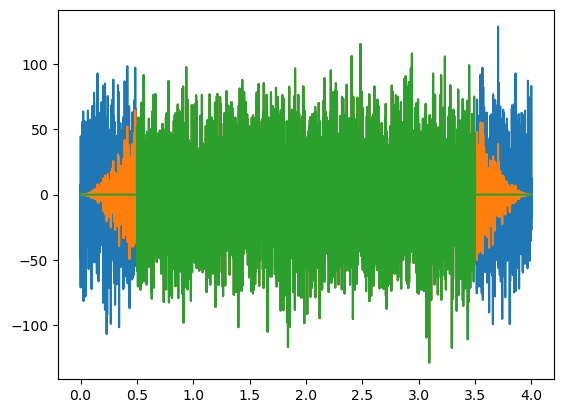

In [62]:
plt.plot(time_array, noise)
plt.plot(time_array, noise*window_tukey_quarter)
plt.plot(time_array, noise*window_rect_quarter)

In [14]:
noise_f, _ = bilby.core.utils.series.nfft(noise, sampling_freq)

(array([   3.,   21.,  152.,  494., 1049., 1195.,  768.,  321.,   78.,
          16.]),
 array([-2.81518414, -2.28501794, -1.75485173, -1.22468553, -0.69451933,
        -0.16435312,  0.36581308,  0.89597929,  1.42614549,  1.95631169,
         2.4864779 ]),
 <BarContainer object of 10 artists>)

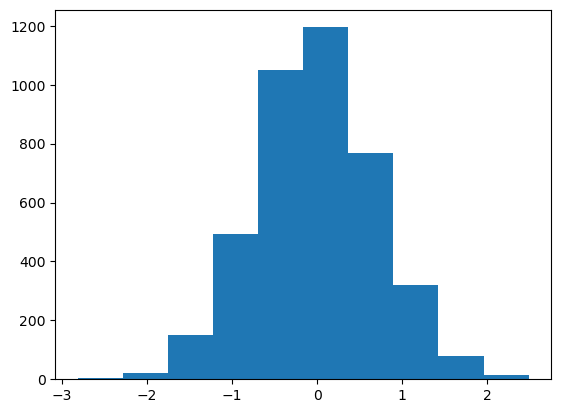

In [17]:
noise_f /= np.sqrt(duration * psd/2)
plt.hist(noise_f, bins=30)

In [18]:
np.std(noise_f)

1.0067994079714635

In [81]:
N = int(duration*sampling_freq)
xs = np.linspace(N-600, N+600, 1000)

In [40]:
def chi_sq(freq_strain, duration, psd):
    return np.sum(4*(np.real(freq_strain)**2 + np.imag(freq_strain)**2)/(duration * psd))

In [69]:
chisqs_full = []
chisqs_rect = []
chisqs_tukey = []
for i in tqdm(range(10000)):
    noise = create_t_domain_noise(sampling_freq, duration, psd)
    noise_rect = noise*window_rect_half
    noise_tukey = noise*window_tukey_half
    noise_f, _ = bilby.core.utils.series.nfft(noise, sampling_freq)
    noise_f_rect, _ = bilby.core.utils.series.nfft(noise_rect, sampling_freq)
    noise_f_tukey, _ = bilby.core.utils.series.nfft(noise_tukey, sampling_freq)
    chisqs_full.append(chi_sq(noise_f, duration, psd))
    chisqs_rect.append(chi_sq(noise_f_rect, duration, psd))
    chisqs_tukey.append(chi_sq(noise_f_tukey, duration, psd))

100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2059.45it/s]


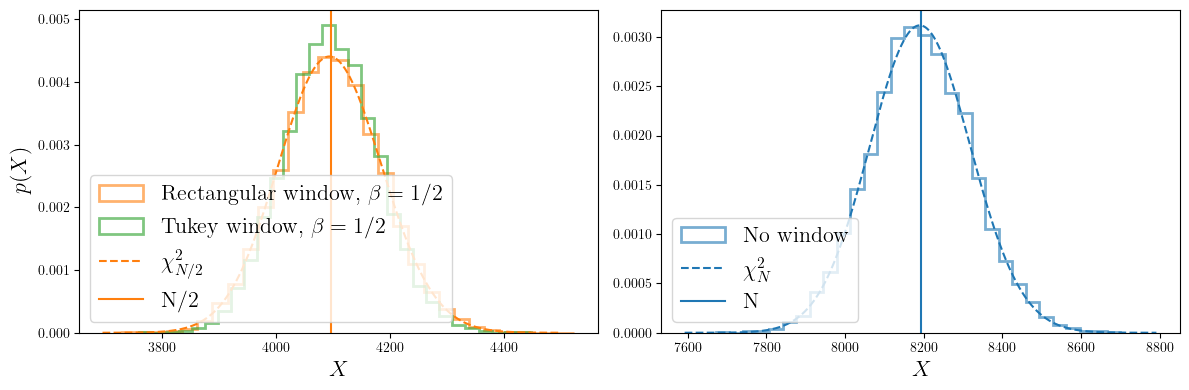

In [181]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.hist(chisqs_full, bins=30, density=True, histtype='step', lw=2, label='No window', alpha=0.6)
ax2.plot(xs, chi2.pdf(xs, df=N), color='#1f77b4', ls='--', label=r'$\chi^{2}_{N}$')
ax2.axvline(N, label='N', color='#1f77b4')
ax2.set_xlabel(r'$X$', fontsize=16)
ax2.legend(loc='lower left', fontsize=16)


ax1.hist(chisqs_rect, bins=30, density=True, histtype='step', color='tab:orange', label=r'Rectangular window, $\beta=1/2$', lw=2, alpha=0.6)
ax1.hist(chisqs_tukey, bins=30, density=True, histtype='step', color='tab:green', lw=2, label=r'Tukey window, $\beta=1/2$', alpha=0.6)
xs_rect = np.linspace(N/2-400, N/2+400, 1000)
ax1.plot(xs_rect, chi2.pdf(xs_rect, df=N/2), color='#ff7f0e', label=r'$\chi^{2}_{N/2}$', ls='--')
ax1.axvline(N/2, color='#ff7f0e', label='N/2')
ax1.set_ylabel(r'$p(X)$', fontsize=16)
ax1.set_xlabel(r'$X$', fontsize=16)
ax1.legend(loc='lower left', fontsize=16)
plt.tight_layout()
plt.savefig('window_noise_stats_demo.png', dpi=300)

In [ ]:
plt.hist(chisqs_full, bins=30, density=True, histtype='step', lw=2, label='No window', alpha=0.6)
plt.hist(chisqs_rect, bins=30, density=True, histtype='step', label=r'Rectangular window, $\beta=1/2$', lw=2, alpha=0.6)
plt.hist(chisqs_tukey, bins=30, density=True, histtype='step', lw=2, label=r'Tukey window, $\beta=1/2$', alpha=0.6)
plt.plot(xs, chi2.pdf(xs, df=N), color='#1f77b4', ls='--', label=r'$\chi^{2}_{N}$')
plt.axvline(N, label='N', color='#1f77b4')

xs_rect = np.linspace(N/2-1000, N/2+1000, 1000)
plt.plot(xs_rect, chi2.pdf(xs_rect, df=N/2), color='#ff7f0e', label=r'$\chi^{2}_{N}$', ls='--')
plt.axvline(N/2, color='#ff7f0e', label='N/2')
plt.ylim(0,0.0064)
plt.xlabel(r'$X$', fontsize=12)
plt.ylabel(r'$p(X)$', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('window_noise_stats_demo.png', dpi=300)

## Window plot

In [139]:
window_alpha1 = tukey(N, alpha=1)
window_alpha0 = tukey(N, alpha=0)
window_alpha0[0] = 0
window_alpha0[-1] = 0
window_alpha05 = tukey(N, alpha=0.5)

In [140]:
window_rect_half_padded = np.concatenate((window_rect_half, np.zeros(7*N)))
window_alpha1_padded = np.concatenate((window_alpha1, np.zeros(7*N)))
window_alpha05_padded = np.concatenate((window_alpha05, np.zeros(7*N)))

In [141]:
windowf_alpha1, new_freqs = bilby.core.utils.nfft(window_alpha1_padded, sampling_freq)
windowf_alpha0, new_freqs =  bilby.core.utils.nfft(window_rect_half_padded, sampling_freq)
windowf_alpha05, new_freqs = bilby.core.utils.nfft(window_alpha05_padded, sampling_freq)

/var/folders/kn/zqc4d69d5tv0pm29p7htw74m0000gn/T/ipykernel_66826/3874397521.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


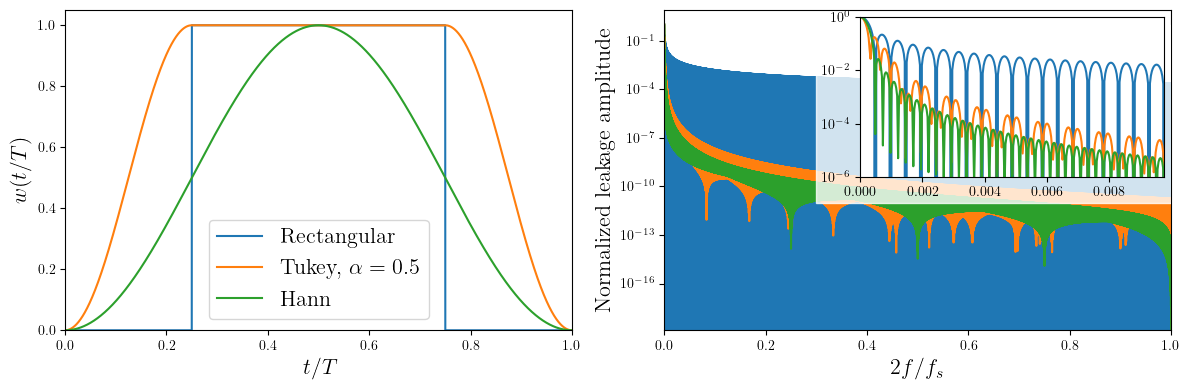

In [180]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(time_array/duration, window_rect_half, label='Rectangular')
ax1.plot(time_array/duration, window_alpha05, label=r'Tukey, $\alpha=0.5$')
ax1.plot(time_array/duration, window_alpha1, label='Hann')
ax1.set_xlabel(r'$t/T$', fontsize=16)
ax1.set_ylabel(r'$w(t/T)$', fontsize=16)
ax1.legend(fontsize=16)
ax1.set_ylim(0,)
ax1.set_xlim(0,1)

# Right subplot: frequency-domain
ax2 = fig.add_subplot(122)
x_vals = new_freqs / (sampling_freq / 2)
ax2.plot(x_vals, abs(windowf_alpha0)/abs(windowf_alpha0[0]))
ax2.plot(x_vals, abs(windowf_alpha05)/abs(windowf_alpha05[0]))
ax2.plot(x_vals, abs(windowf_alpha1)/abs(windowf_alpha1[0]))
ax2.set_xlabel(r'$2f/f_{s}$', fontsize=16)
ax2.set_ylabel(r'Normalized leakage amplitude', fontsize=16)
ax2.set_yscale('log')
ax2.set_xlim(0,1)

# Inset: zoom in on low-frequency region
axins = inset_axes(ax2, width="60%", height="50%", loc='upper right')
axins.plot(x_vals, abs(windowf_alpha0)/abs(windowf_alpha0[0]))
axins.plot(x_vals, abs(windowf_alpha05)/abs(windowf_alpha05[0]))
axins.plot(x_vals, abs(windowf_alpha1)/abs(windowf_alpha1[0]))
axins.set_xlim(0, 10 / (sampling_freq / 2))
axins.set_ylim(1e-6, 1)  # adjust as needed based on your data
axins.set_yscale('log')
axins.tick_params(labelsize=10)

#Add white background behind left y-axis ticks
ax2.add_patch(patches.Rectangle(
    (0.3, 1e-11), 1.7, 1,
    color='white', alpha=0.8, zorder=8)
)
    
# Optionally draw a box on the main plot to show zoom area
#mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('windows.png', dpi=300)